<center><img src=  "ml_overview.jpeg" width="800" ></center>

<center><img src=  "supervised_vs_unsupervised.png" width="600" ></center>

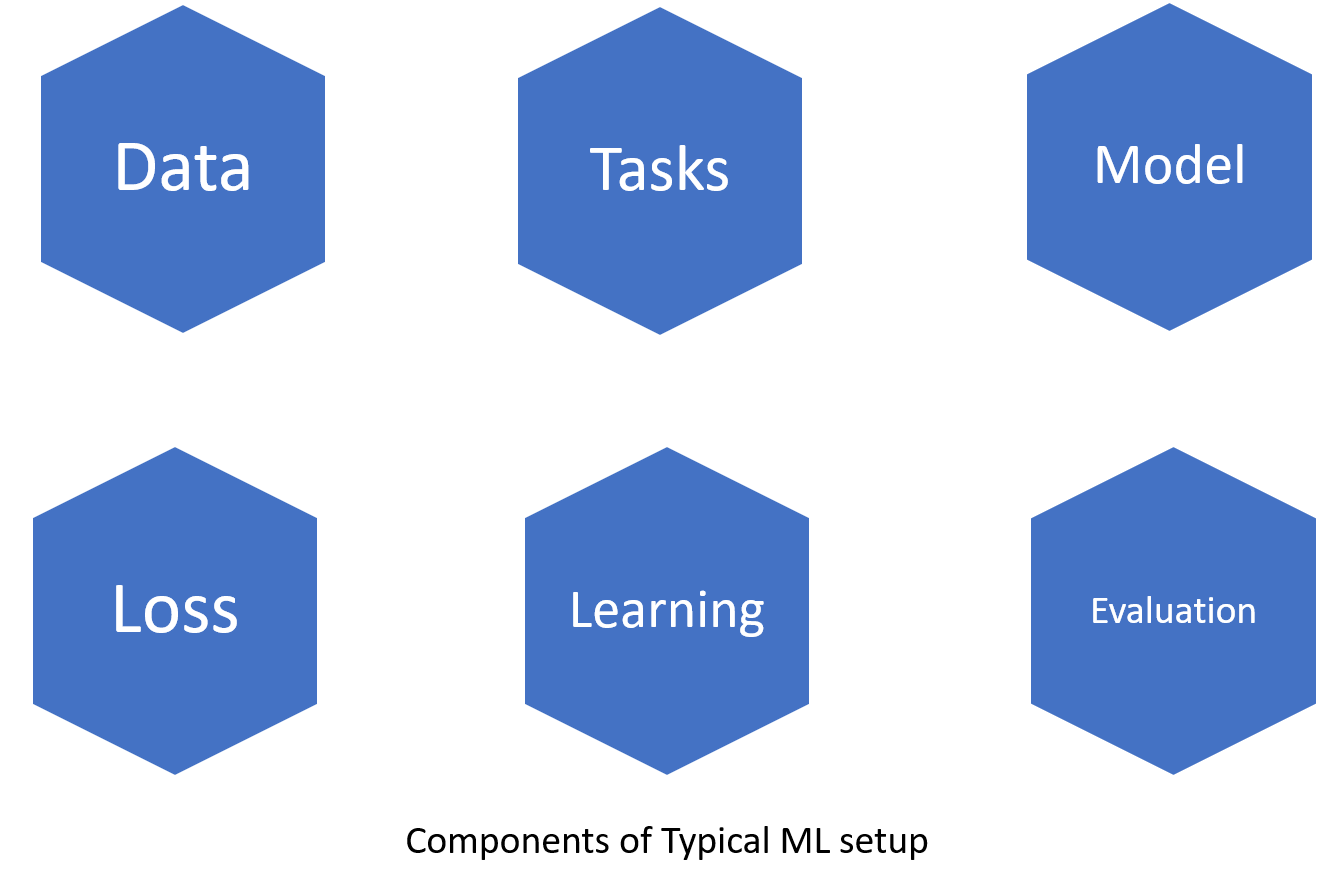

In [6]:
x = Image(filename='C:/Users/User-WFH/PythonNotebooks/ML2/ML Components.png') 
display(x)

### Linear regression

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

           x          y
0  32.502345  31.707006
1  53.426804  68.777596
2  61.530358  62.562382
3  47.475640  71.546632
4  59.813208  87.230925


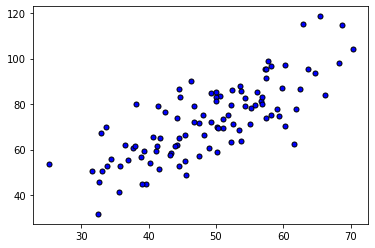

(100, 2)

In [18]:
### plotting functions
def plot_points(X, y):
    plt.scatter(X, y, s = 25, color = 'blue', edgecolor = 'k')

data = pd.read_csv('data.csv')
print(data.head())

X = np.array(data['x'].values)
y = np.array(data['y'].values)
plot_points(X,y)
plt.show()
data.shape

### Equation of a line
<center><img src=  "line_eq.png" width="200" ></center>

### Cost Function
<center><img src=  "error_eq.png" width="400" ></center>

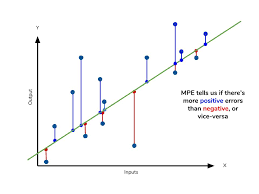

In [16]:
x = Image(filename='C:/Users/User-WFH/PythonNotebooks/ML2/error.png') 
display(x)

In [19]:
def compute_error_for_line_given_points(b,m,points):
    totalError = 0 
    for i in range (0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y-(m*x + b)) ** 2
    return totalError/ float(len(points))

### Derivatives of cost function (gradient)
<center><img src=  "BP.png" width="300" ></center>

## Shape of Loss Function

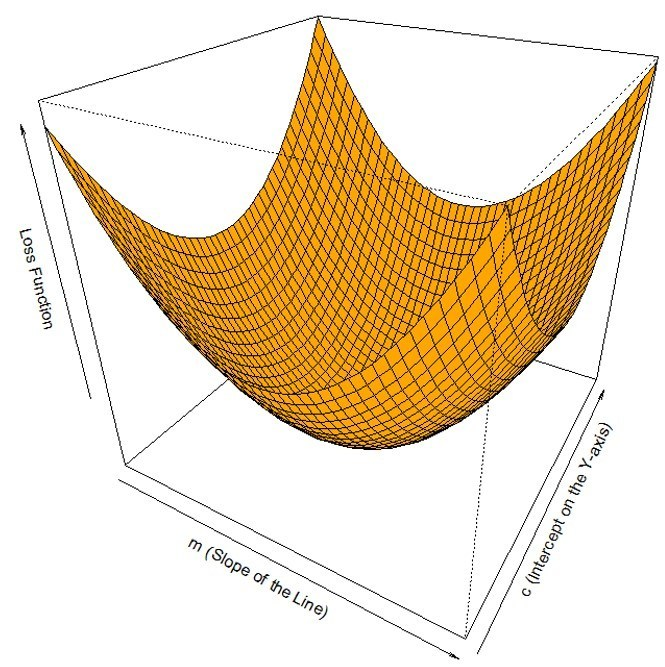

In [11]:
x = Image(filename='C:/Users/User-WFH/PythonNotebooks/ML2/loss_function.jpg') 
display(x)

## Gradient Descent

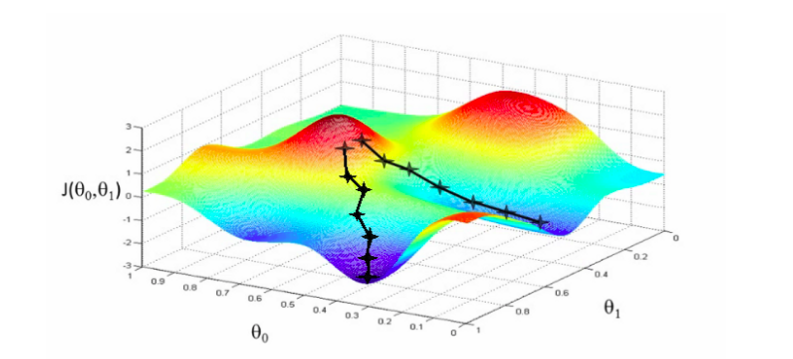

In [10]:
x = Image(filename='C:/Users/User-WFH/PythonNotebooks/ML2/2d.png') 
display(x)

### Gradient descent
<center><img src=  "gd.gif" width="800" ></center>

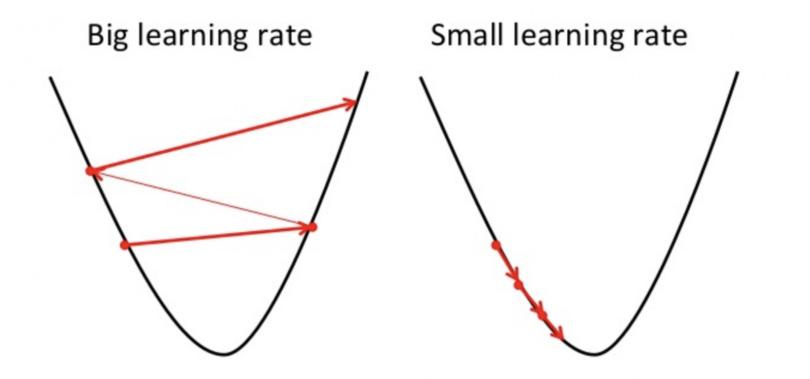

In [20]:
def step_gradient(b_current, m_current, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        
        m_gradient += -(2/N) * x * (y - (m_current * x + b_current))
        b_gradient += -(2/N) * (y - (m_current * x + b_current))
    
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient) 
    return [new_b,new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iteartions):
    b = starting_b
    m = starting_m
    for i in range(num_iteartions):
        b,m = step_gradient(b, m, np.array(points), learning_rate)
        if i % 1 == 0:
            print("After {0} iterations".format(i))
            print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(b, m, compute_error_for_line_given_points(b, m, points)))
            display(m,b, 'black')
    return [b,m]




In [30]:
def display(m, b, color='g--'):  #Plotting function
    plt.xlim(0,100)
    plt.ylim(0,150)
    x = np.arange(0, 100, 5)
    plt.plot(x, m*x+b, color)
    
def run():
    #Step 1: Collect the data
    points = data.values
    
    #Step 2: Define our Hyperparameters
    learning_rate = 0.0001 #how fast the data converge
    
    #y=mx+b (Slope formule)
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 10
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
    display(m,b, 'black')
    plot_points(X,y)
    

Starting gradient descent at b = 0, m = 0, error = 5565.10783448321
Running...
After 0 iterations
Starting gradient descent at b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649
After 1 iterations
Starting gradient descent at b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673
After 2 iterations
Starting gradient descent at b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553897
After 3 iterations
Starting gradient descent at b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200527
After 4 iterations
Starting gradient descent at b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947
After 5 iterations
Starting gradient descent at b = 0.02896524076647862, m = 1.4553540088980408, error = 114.03414906038147
After 6 iterations
Starting gradient descent at b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713654
After 7 iterations
Starting gradient descent at b = 0

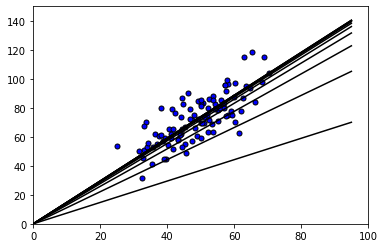

In [31]:
run()

<center><img src=  "gradient_descent_example.gif" width="800" ></center>

## Decision Tree - Example for Classification Algo

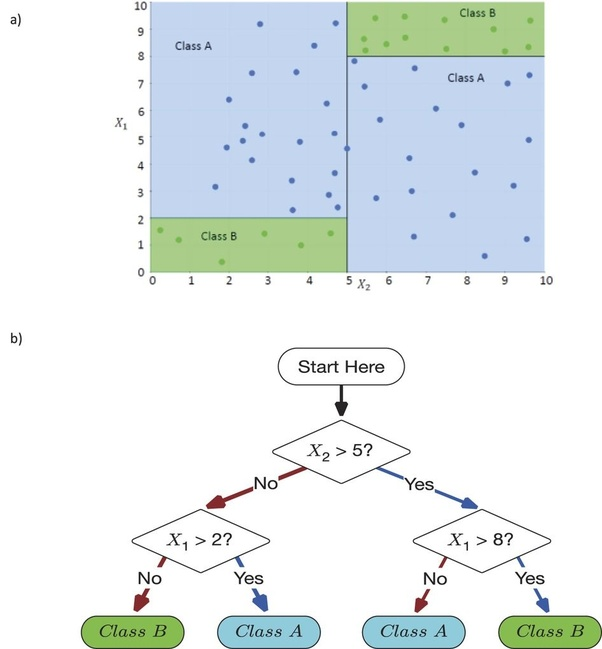

In [12]:
x = Image(filename='C:/Users/User-WFH/PythonNotebooks/ML2/DT_Example.png') 
display(x)

## Entropy / Information Gain

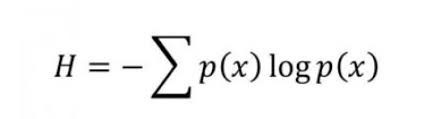

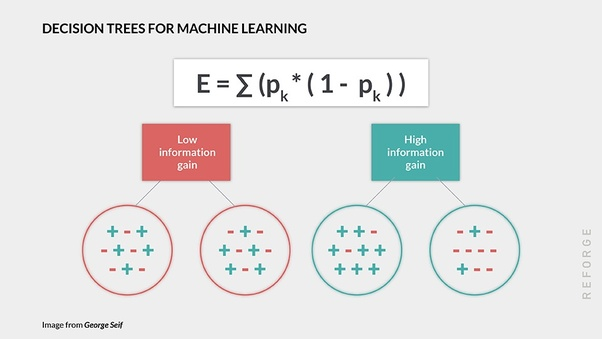

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
iris = pd.read_csv('iris.csv')
print(iris.head())
x = iris.iloc[:, [0, 1, 2, 3]].values


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [18]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Splitting Feature and Target Variable
from sklearn.model_selection import train_test_split
X = iris.iloc[:,:-1].values #Feature Variables
y = iris.iloc[:,-1].values #Target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)





## Confusion Matrix

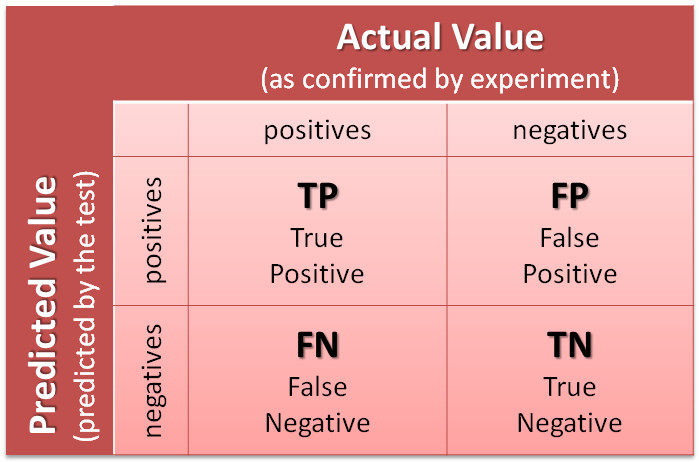

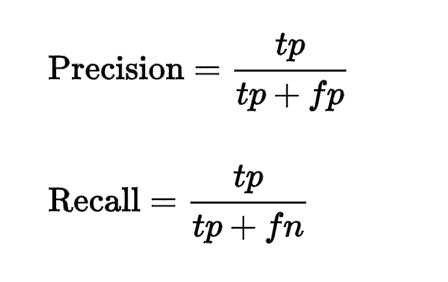

In [15]:
x = Image(filename='C:/Users/User-WFH/PythonNotebooks/ML2/confusion_matrix.png') 
y = Image(filename='C:/Users/User-WFH/PythonNotebooks/ML2/precision_recall.png') 

display(x,y)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy is 0.9777777777777777


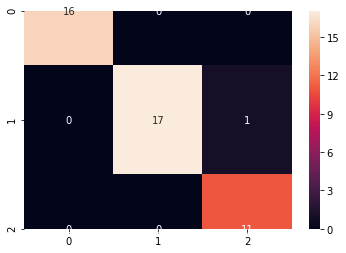

In [69]:
import seaborn as sns
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

sns.heatmap(cf_matrix, annot=True)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

[Text(133.92000000000002, 195.696, 'X[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(234.36, 65.232, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267

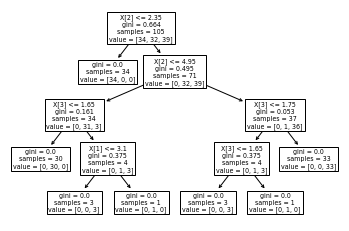

In [70]:
from sklearn import tree
tree.plot_tree(clf) 

### K - means clustering

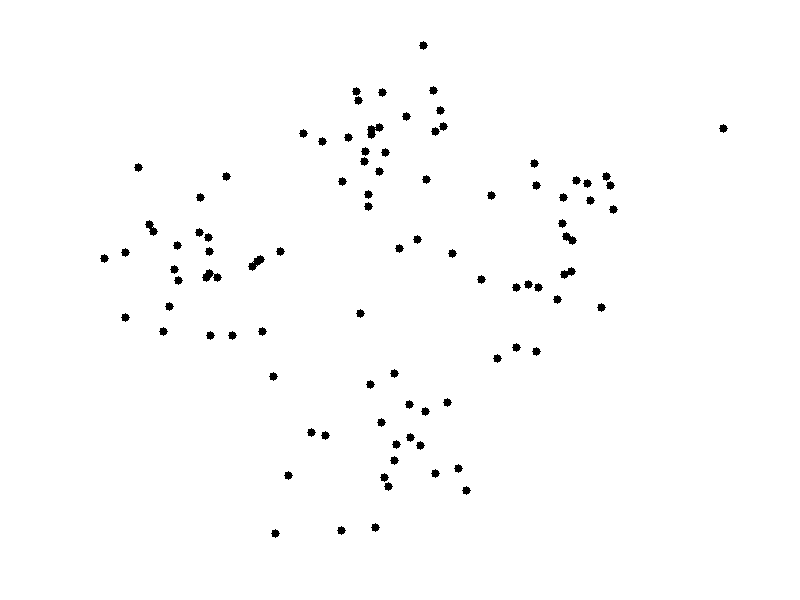

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
dataset = pd.read_csv('iris.csv')
print(dataset.head())
x = dataset.iloc[:, [0, 1, 2, 3]].values

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


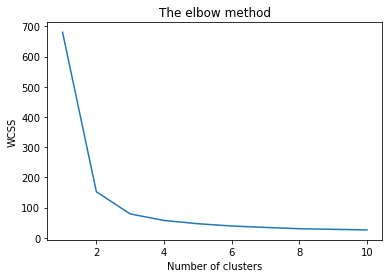

In [34]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

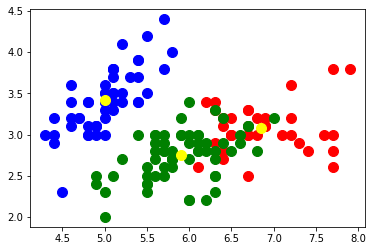

In [36]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green')
#plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')